In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

from classifier_manager import load_classifier_manager
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_names = {
    'qwen2.5-coder': 'Code LLM',
    'qwen2.5': 'Generic LLM',
    'qwq': 'Reasoning LLM',
}

sample_sizes = {
    'comment': 762,
    'javadoc': 760,
    'multiline': 738,
    'inline': 756,
}

train_sizes = [0.01, 0.05, 0.1, 0.25, 0.5]

In [3]:
plt.rcParams.update({'font.weight': 'bold', 'axes.labelweight': 'bold', 'axes.titleweight': 'bold', 
                     'font.size': 10,
                     })
plt.style.use('seaborn-v0_8-whitegrid')

# Draw RQ1 plots


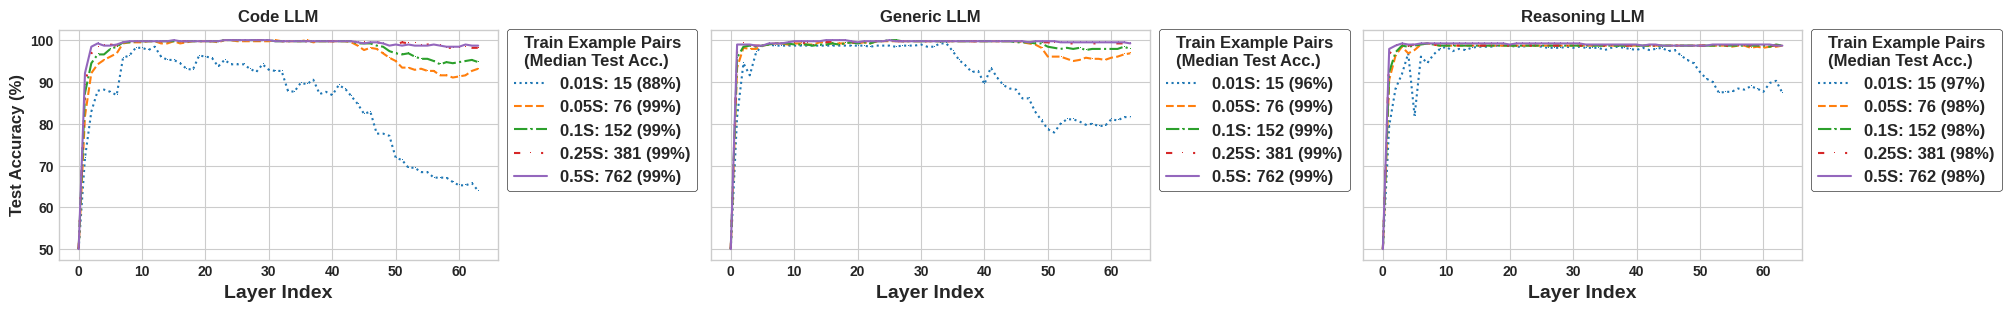

In [11]:
# model_name = "qwen2.5-coder"
# model_name = "qwen2.5"

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 3), constrained_layout=True)
linesyles = ['dotted', 'dashed', 'dashdot', (0, (3, 10, 1, 10, 1, 10)), 'solid']

for i, model_name in enumerate(model_names):
    # plt.style.use("seaborn-v0_8-whitegrid")
    sample_size = sample_sizes['comment']
    for train_size, linestyle in zip(train_sizes, linesyles):
        classifier_path = Path(f"classifiers/{model_name}/comment/{sample_size}_{train_size}/1.pth")
        try:
            classifier_manager = load_classifier_manager(classifier_path)
        except FileNotFoundError:
            continue
        
        axs[i].plot(
                list(map(lambda x: x * 100, classifier_manager.testacc)),
                marker=',',
                linestyle=linestyle,
                label=f"{train_size}S: {int(train_size*(sample_size*2))} ({int(np.median(classifier_manager.testacc) * 100)}%)",
        )
        
    axs[i].set_title(f"{model_names[model_name]}")

        # draw a horizontal line at the minimum test accuracy
        # plt.axhline(classifier_manager.testacc[-1] * 100, color="gray", linestyle="--", alpha=0.3, label=f"Min: {classifier_manager.testacc[-1] * 100:.2f}%")
# Check if there are any lines to plot
for i, ax in enumerate(axs):
    box = ax.get_position()
    # ax.set_position([box.x0, box.y0 + box.height * 0.3,
    #                 box.width, box.height])

    # Put a legend below current axis
    # legend = ax.legend(
    #     loc='center left',
    #     bbox_to_anchor=(0.0, -0.4),
    #     borderaxespad=0.0,
    #     frameon=True,  # This gives it a box with edges
    #     title="Train Size (Median Test Acc.)",
    #     ncols=3,
    #     fontsize='large',
    #     title_fontsize='large',
    # )

    # Put a legend to the right of the current axis
    legend = ax.legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.65),
        borderaxespad=0.0,
        frameon=True,  # This gives it a box with edges
        title="Train Example Pairs\n(Median Test Acc.)",
        ncols=1,
        fontsize='large',
        title_fontsize='large',
    )


    legend.get_frame().set_edgecolor('black') 
    legend.get_frame().set_linewidth(0.5)  # Set the edge width of the legend box
    ax.set_xlabel("Layer Index", fontsize=14, fontweight='bold')
    if ax is axs[0]:
        ax.set_ylabel("Test Accuracy (%)", fontsize=12, fontweight='bold')
    else:
        ax.set_ylabel("")
    ax.set_yticks(np.arange(50, 101, 10))
    ax.grid(True)

# set font to be bold
# fig.tight_layout()
# fig.suptitle("Test Accuracy of $\\mathregular{{P_c(e)}}$ for Comment Concept", fontsize=16, fontweight='bold')
# fig.subplots_adjust(wspace=0.55)  # Adjust top to make room for the title
plt.savefig(Path("figures") / "rq1_figure.png", bbox_inches='tight')
plt.savefig(Path("figures") / "rq1_figure.pdf", bbox_inches='tight')
fig.show()

# Draw RQ2 plots

## One Model Per Concept 

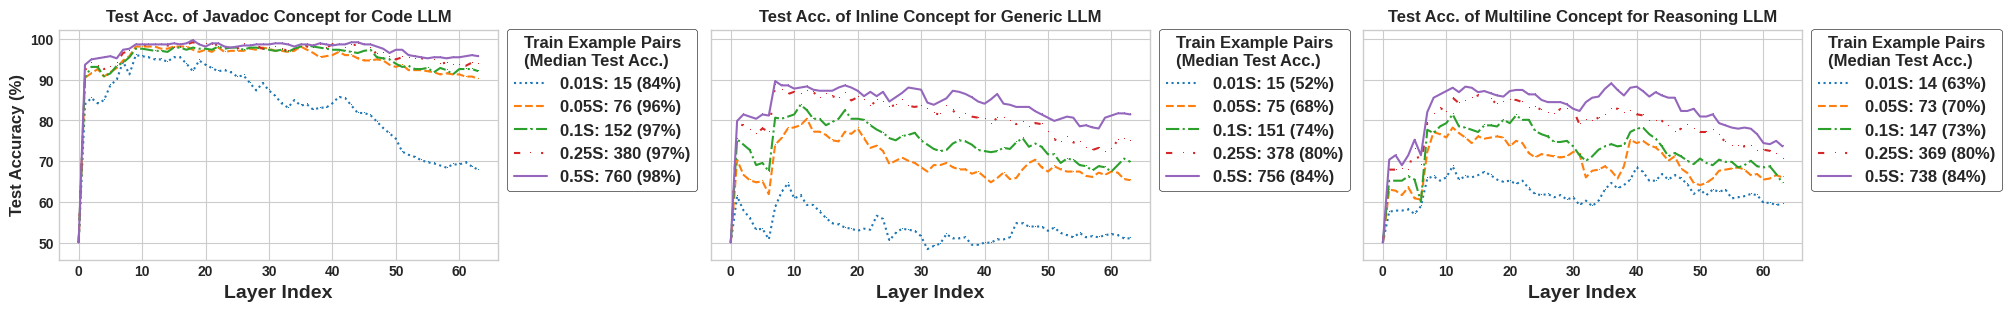

In [12]:
# model_name = "qwen2.5-coder"
# model_name = "qwen2.5"

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 3), constrained_layout=True)
linesyles = ['dotted', 'dashed', 'dashdot', (0, (3, 10, 1, 10, 1, 10)), 'solid']

concepts = {
    'qwen2.5-coder': 'javadoc',
    'qwen2.5': 'inline',
    'qwq': 'multiline',
}

for j, model_name in enumerate(model_names):
    concept = concepts[model_name]
    sample_size = sample_sizes[concept]
    for train_size, linestyle in zip(train_sizes, linesyles):
        classifier_path = Path(f"classifiers/{model_name}/{concept}/{sample_size}_{train_size}/1.pth")
        try:
            classifier_manager = load_classifier_manager(classifier_path)
        except FileNotFoundError:
            continue
        
        axs[j].plot(
                list(map(lambda x: x * 100, classifier_manager.testacc)),
                marker=",",
                linestyle=linestyle,
                label=f"{train_size}S: {int(train_size*(sample_size*2))} ({int(np.median(classifier_manager.testacc) * 100)}%)",
            )

    if j == 0:
        axs[j].set_ylabel(f"Test Accuracy (%)", fontsize=12, fontweight='bold')
    else:
        axs[j].set_ylabel("")
    
    axs[j].set_xlabel("Layer Index", fontsize=14, fontweight='bold')

    axs[j].set_yticks(np.arange(50, 101, 10))
    
    # Put a legend below current axis
    # legend = ax.legend(
    #     loc='center left',
    #     bbox_to_anchor=(0.0, -0.4),
    #     borderaxespad=0.0,
    #     frameon=True,  # This gives it a box with edges
    #     title="Train Size (Median Test Acc.)",
    #     ncols=3,
    #     fontsize='large',
    #     title_fontsize='large',
    # )

    # Put a legend to the right of the current axis
    legend = axs[j].legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.65),
        borderaxespad=0.0,
        frameon=True,  # This gives it a box with edges
        title="Train Example Pairs\n(Median Test Acc.)",
        ncols=1,
        fontsize='large',
        title_fontsize='large',
    )
    legend.get_frame().set_edgecolor('black') 
    legend.get_frame().set_linewidth(0.5)  # Set the edge width of the legend box
    
    axs[j].grid(True)
    axs[j].set_title(f"Test Acc. of {concept.capitalize()} Concept for {model_names[model_name]}")


# set font to be bold
# plt.rcParams.update({'font.weight': 'bold', 'axes.labelweight': 'bold', 'axes.titleweight': 'bold', 'font.size': 10})
# fig.tight_layout()
# fig.suptitle("Test Accuracy of $\\mathregular{{P_c(e)}}$ for Javadoc, Inline, and Multiline Comment Concepts", fontsize=16, fontweight='bold')
# fig.subplots_adjust(top=0.9, hspace=0.2)  # Adjust top to make room for the title
plt.savefig(Path("figures") / "rq2_figure.png", bbox_inches='tight')
plt.savefig(Path("figures") / "rq2_figure.pdf", bbox_inches='tight')
fig.show()

## All Models and All Concepts

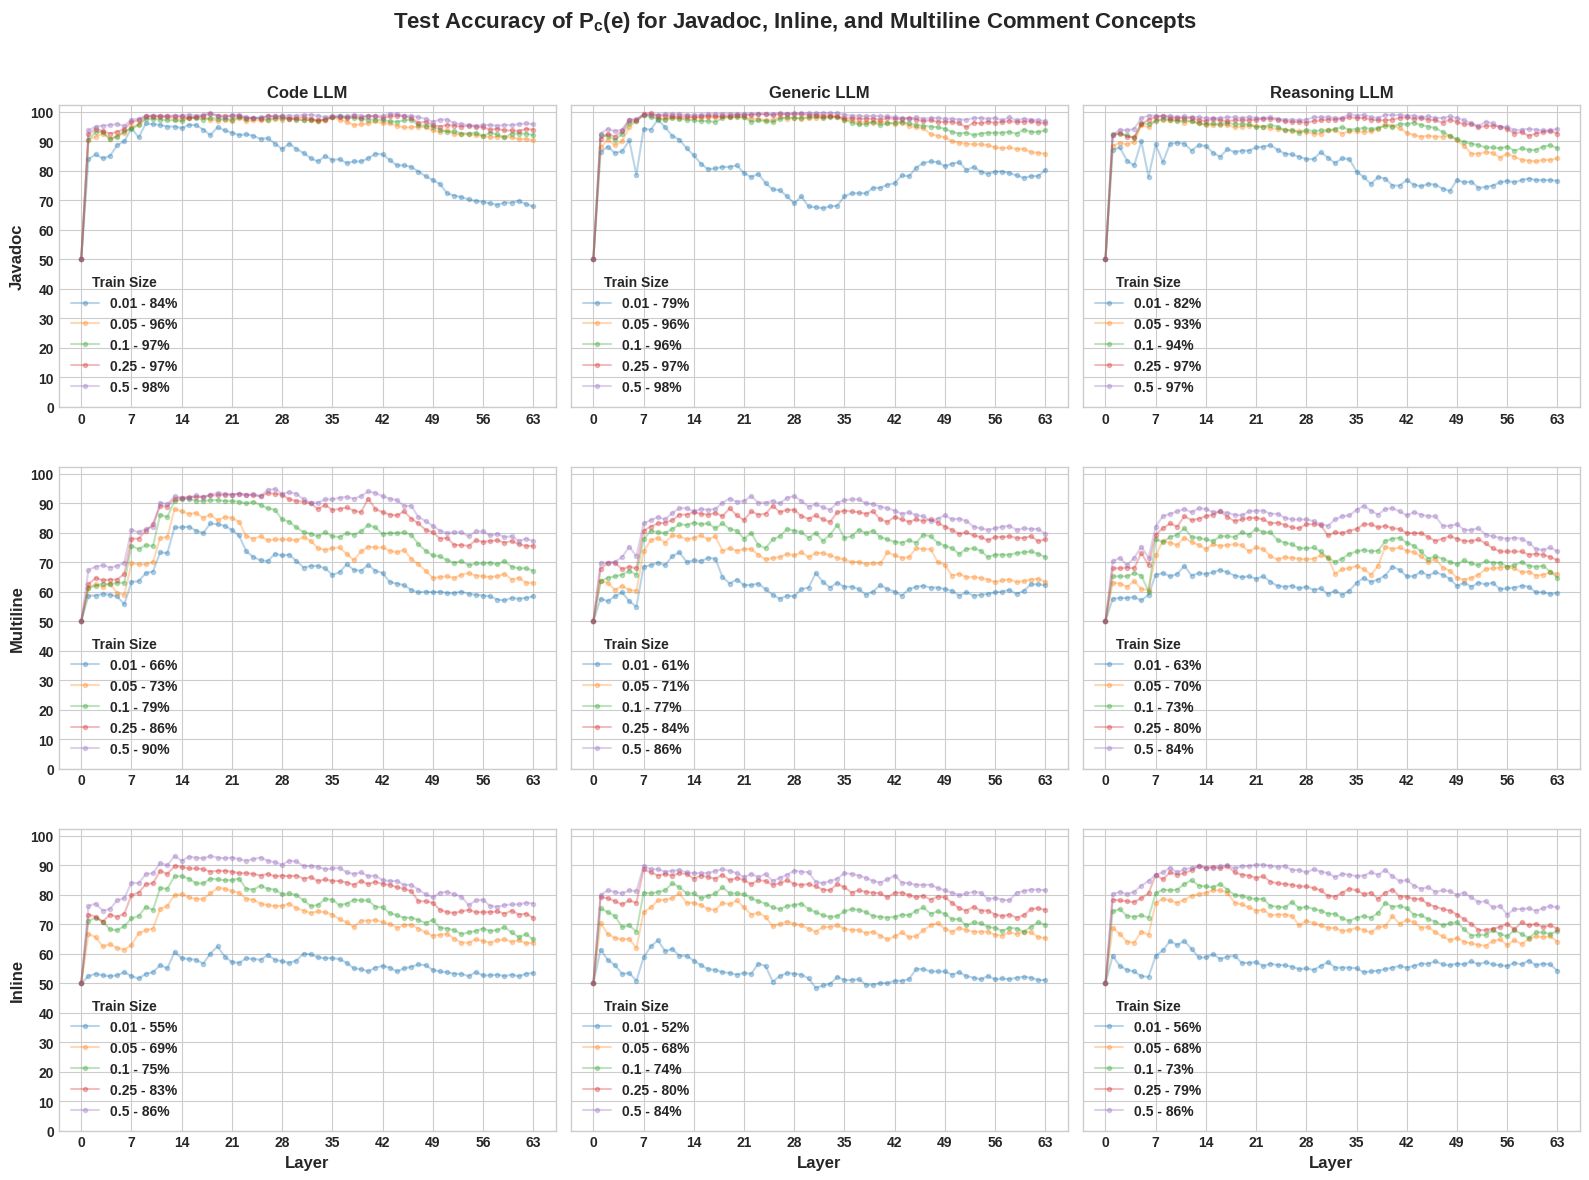

In [32]:
# model_name = "qwen2.5-coder"
# model_name = "qwen2.5"

fig, axs = plt.subplots(3, 3, sharey=True, figsize=(16, 12))

concepts = ['javadoc', 'multiline', 'inline']
for j, model_name in enumerate(model_names):
    for i, concept in enumerate(concepts):
        sample_size = sample_sizes[concept]
        for train_size in train_sizes:
            classifier_path = Path(f"classifiers/{model_name}/{concept}/{sample_size}_{train_size}/1.pth")
            try:
                classifier_manager = load_classifier_manager(classifier_path)
            except FileNotFoundError:
                continue
            
            axs[i, j].plot(
                    list(map(lambda x: x * 100, classifier_manager.testacc)),
                    marker=".",
                    label=f"{train_size} - {int(np.median(classifier_manager.testacc) * 100)}%",
                    alpha=0.3,
                )

        if j == 0:
            axs[i, j].set_ylabel(concept.capitalize(), fontsize=12, fontweight='bold')
        else:
            axs[i, j].set_ylabel("")

        if i == 2:
            axs[i, j].set_xlabel("Layer", fontsize=12, fontweight='bold')
        else:
            axs[i, j].set_xlabel("")
      
        axs[i, j].set_yticks(np.arange(0, 101, 10))
        axs[i, j].set_xticks(np.arange(0, 65, 7))
        axs[i, j].legend(loc="best", title="Train Size")
        axs[i, j].grid(True)
        if i == 0:
            axs[i, j].set_title(f"{model_names[model_name]}")
        else:
            axs[i, j].set_title("")

# set font to be bold
plt.rcParams.update({'font.weight': 'bold', 'axes.labelweight': 'bold', 'axes.titleweight': 'bold', 'font.size': 10})
fig.tight_layout()
fig.suptitle("Test Accuracy of $\\mathregular{{P_c(e)}}$ for Javadoc, Inline, and Multiline Comment Concepts", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.9, hspace=0.2)  # Adjust top to make room for the title
plt.savefig(Path("figures") / "rq2_all.png")
plt.savefig(Path("figures") / "rq2_all.pdf")
fig.show()